<a href="https://colab.research.google.com/github/Alino4kaAlino4ka/TgBotGPT/blob/main/TgBotGPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q aiogram openai==1.63.0 nest_asyncio

In [ ]:
import os
import asyncio
import nest_asyncio
from aiogram import Bot, Dispatcher, types
from aiogram.filters import Command
from openai import OpenAI
from google.colab import userdata

# Применяем patch для работы asyncio в Colab
nest_asyncio.apply()

print("✅ Библиотеки успешно импортированы и окружение настроено")

✅ Библиотеки успешно импортированы и окружение настроено


In [ ]:
# Загрузка токенов из секретов Colab
try:
    TELEGRAM_BOT_TOKEN = userdata.get('TELEGRAM_BOT_TOKEN')
    VSEGPT_API_KEY = userdata.get('VSEGPT_API_KEY')
except Exception as e:
    print("Ошибка загрузки токенов. Убедитесь, что вы добавили их в секреты Colab:")
    print("1. Нажмите на значок ключа слева")
    print("2. Добавьте две переменные: TELEGRAM_BOT_TOKEN и VSEGPT_API_KEY")
    print(f"Ошибка: {str(e)}")
    raise

In [ ]:
knowledge_base = {
    "тематика": "Программирование и искусственный интеллект",
    "количество записей": 15,
    "примеры вопросов": [
        "Как создать Telegram бота?",
        "Что такое ChatGPT?",
        "Как работает API VseGPT?",
        "Какие языки программирования лучше изучать в 2025 году?",
        "В чем разница между машинным обучением и глубоким обучением?",
        "Как начать работать с нейросетями?",
        "Что такое GPT-4 и чем он отличается от GPT-3?",
        "Как работает технология блокчейн?",
        "Какие фреймворки для машинного обучения самые популярные?",
        "Как создать простую нейросеть на Python?",
        "Что такое компьютерное зрение?",
        "Как работают рекомендательные системы?",
        "Какие есть облачные платформы для ИИ?",
        "Что такое трансформеры в машинном обучении?",
        "Как обрабатывать естественный язык (NLP)?"
    ],
    "контент": {
        "Как создать Telegram бота?": "Для создания Telegram бота нужно:\n1. Зарегистрировать бота у @BotFather\n2. Получить токен\n3. Использовать библиотеку aiogram или python-telegram-bot\n4. Написать обработчики сообщений\n5. Развернуть бота на сервере",
        "Что такое ChatGPT?": "ChatGPT - это продвинутая языковая модель, разработанная OpenAI, способная генерировать человекообразный текст, отвечать на вопросы, писать код и поддерживать содержательные диалоги.",
        "Как работает API VseGPT?": "API VseGPT предоставляет доступ к языковым моделям через REST API. Для работы нужно:\n1. Получить API ключ\n2. Отправлять запросы на https://api.vsegpt.ru/v1\n3. Обрабатывать ответы\n4. Для доступа требуется активная подписка",
        "Какие языки программирования лучше изучать в 2025 году?": "Топ языков для изучения в 2025:\n1. Python - для ИИ и анализа данных\n2. JavaScript - для веб-разработки\n3. Go - для высоконагруженных систем\n4. Rust - для системного программирования\n5. Kotlin - для мобильной разработки",
        "В чем разница между машинным обучением и глубоким обучением?": "Машинное обучение - более широкое понятие, включающее различные алгоритмы. Глубокое обучение - подмножество ML, использующее нейронные сети с многими слоями (глубокие сети). DL требует больше данных и вычислительных ресурсов.",
        "Как начать работать с нейросетями?": "Шаги для начала:\n1. Изучить Python и основы математики\n2. Освоить библиотеки: NumPy, Pandas, Matplotlib\n3. Изучить фреймворки: TensorFlow/PyTorch\n4. Практиковаться на Kaggle\n5. Начать с простых архитектур (перцептроны, CNN)",
        "Что такое GPT-4 и чем он отличается от GPT-3?": "GPT-4 - более продвинутая версия языковой модели OpenAI с:\n1. Улучшенной точностью\n2. Поддержкой большего контекста\n3. Мультимодальностью (работа с текстом и изображениями)\n4. Лучшей производительностью\n5. Уменьшенным количеством ошибок",
        "Как работает технология блокчейн?": "Блокчейн - это:\n1. Децентрализованная база данных\n2. Состоит из цепочки блоков\n3. Каждый блок содержит хеш предыдущего\n4. Данные защищены криптографически\n5. Применения: криптовалюты, смарт-контракты, NFT",
        "Какие фреймворки для машинного обучения самые популярные?": "Популярные фреймворки:\n1. TensorFlow (Google)\n2. PyTorch (Facebook)\n3. Scikit-learn (для классического ML)\n4. Keras (высокоуровневая надстройка)\n5. MXNet\n6. JAX",
        "Как создать простую нейросеть на Python?": "Пример создания нейросети:\n1. Установить TensorFlow/Keras\n2. Подготовить данные\n3. Создать модель Sequential()\n4. Добавить слои Dense\n5. Скомпилировать с optimizer и loss\n6. Обучить методом fit()\n7. Оценить точность",
        "Что такое компьютерное зрение?": "Компьютерное зрение - область ИИ для:\n1. Анализа и понимания изображений/видео\n2. Задачи: классификация, обнаружение объектов, сегментация\n3. Основные алгоритмы: CNN, R-CNN, YOLO\n4. Применения: меддиагностика, автономные авто, распознавание лиц",
        "Как работают рекомендательные системы?": "Рекомендательные системы используют:\n1. Коллаборативную фильтрацию (по поведению пользователей)\n2. Контентную фильтрацию (по характеристикам товаров)\n3. Гибридные подходы\n4. Глубокое обучение для сложных паттернов\n5. Примеры: Netflix, Amazon, Spotify",
        "Какие есть облачные платформы для ИИ?": "Основные облачные платформы:\n1. AWS SageMaker\n2. Google Vertex AI\n3. Microsoft Azure ML\n4. IBM Watson\n5. Yandex DataSphere\nПредоставляют инструменты для обучения и развертывания моделей",
        "Что такое трансформеры в машинном обучении?": "Трансформеры - архитектура нейросетей для:\n1. Обработки последовательных данных\n2. Используют механизм внимания (attention)\n3. Легко параллелизуются\n4. Примеры: BERT, GPT\n5. Революционизировали NLP",
        "Как обрабатывать естественный язык (NLP)?": "Основные этапы NLP:\n1. Токенизация\n2. Лемматизация/стемминг\n3. Удаление стоп-слов\n4. Векторизация (TF-IDF, Word2Vec)\n5. Использование моделей (BERT, GPT)\n6. Оценка результатов"
    }
}

In [ ]:
# Инициализация клиента VseGPT
client = OpenAI(
    api_key=VSEGPT_API_KEY,
    base_url="https://api.vsegpt.ru/v1"
)

# Инициализация Telegram бота
bot = Bot(token=TELEGRAM_BOT_TOKEN)
dp = Dispatcher()

In [ ]:
# Обработчик команды /start
@dp.message(Command("start"))
async def start_command(message: types.Message):
    await message.answer(
        "Привет! Я бот с базой знаний по программированию и ИИ.\n"
        "Задайте мне вопрос или введите /help для справки."
    )

# Обработчик команды /help
@dp.message(Command("help"))
async def help_command(message: types.Message):
    help_text = (
        f"📚 Информация о базе знаний:\n"
        f"🔹 Тематика: {knowledge_base['тематика']}\n"
        f"🔹 Количество записей: {knowledge_base['количество записей']}\n"
        f"🔹 Примеры вопросов:\n"
    )
    for question in knowledge_base["примеры вопросов"]:
        help_text += f"  - {question}\n"
    help_text += "\nПопробуйте задать один из этих вопросов!"
    await message.answer(help_text)

# Обработчик текстовых сообщений
@dp.message()
async def handle_message(message: types.Message):
    user_question = message.text.strip()

    # Проверка базы знаний
    if user_question in knowledge_base["контент"]:
        await message.answer(knowledge_base["контент"][user_question])
        return

    # Запрос к VseGPT API
    try:
        response = client.chat.completions.create(
            model='openai/gpt-4o-mini',
            messages=[
                {"role": "system", "content": "Ты - помощник по программированию и ИИ. Отвечай кратко и информативно."},
                {"role": "user", "content": user_question}
            ],
            temperature=0.3,
            extra_headers={"X-Title": "Telegram Knowledge Bot"}
        )
        await message.answer(response.choices[0].message.content)
    except Exception as e:
        await message.answer(f"⚠️ Произошла ошибка при обработке запроса\n\n{str(e)}")

In [ ]:
async def run_bot():
    print("🟢 Бот успешно запущен!")
    print(f"🔗 Перейдите в Telegram и начните общение с ботом")
    await dp.start_polling(bot)

def start_bot():
    try:
        loop = asyncio.get_event_loop()
        bot_task = loop.create_task(run_bot())

        # Ожидание для поддержания работы бота
        loop.run_forever()
    except KeyboardInterrupt:
        print("\n🛑 Остановка бота...")
        bot_task.cancel()
        try:
            loop.run_until_complete(bot_task)
        except asyncio.CancelledError:
            print("✅ Бот успешно остановлен")
    except Exception as e:
        print(f"🔴 Критическая ошибка: {e}")
    finally:
        loop.run_until_complete(bot.session.close())
        loop.close()

# Запускаем бота
start_bot()

🟢 Бот успешно запущен!
🔗 Перейдите в Telegram и начните общение с ботом


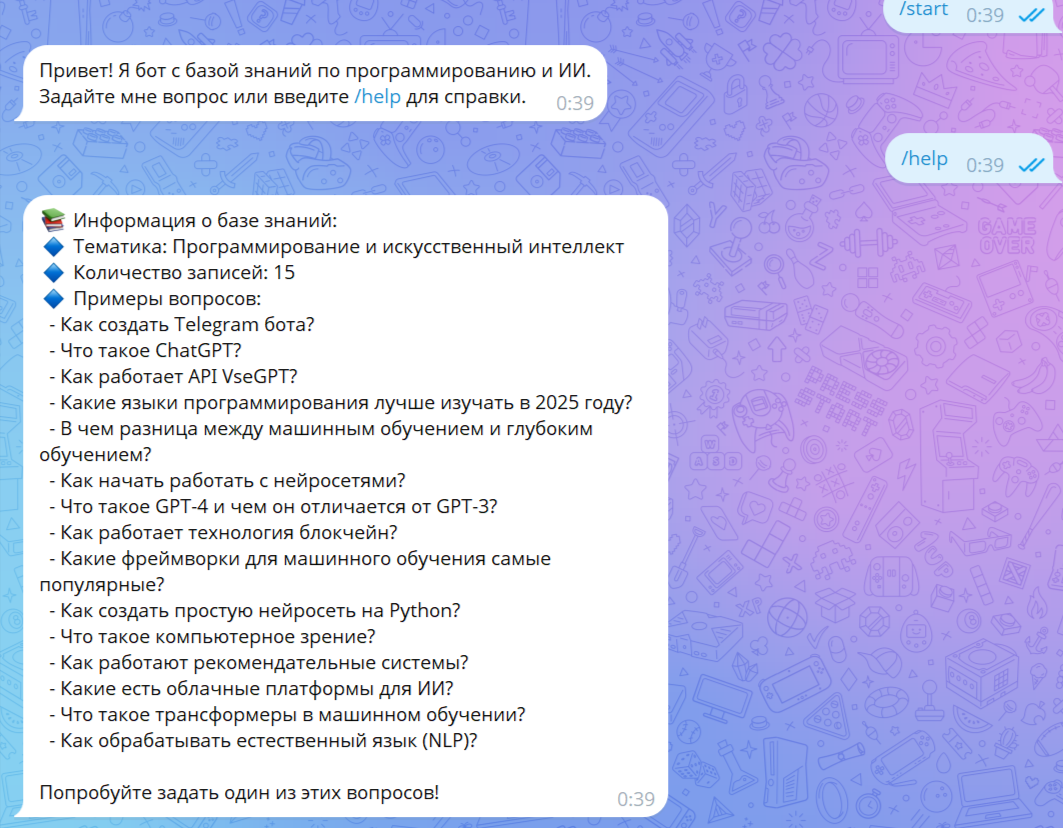

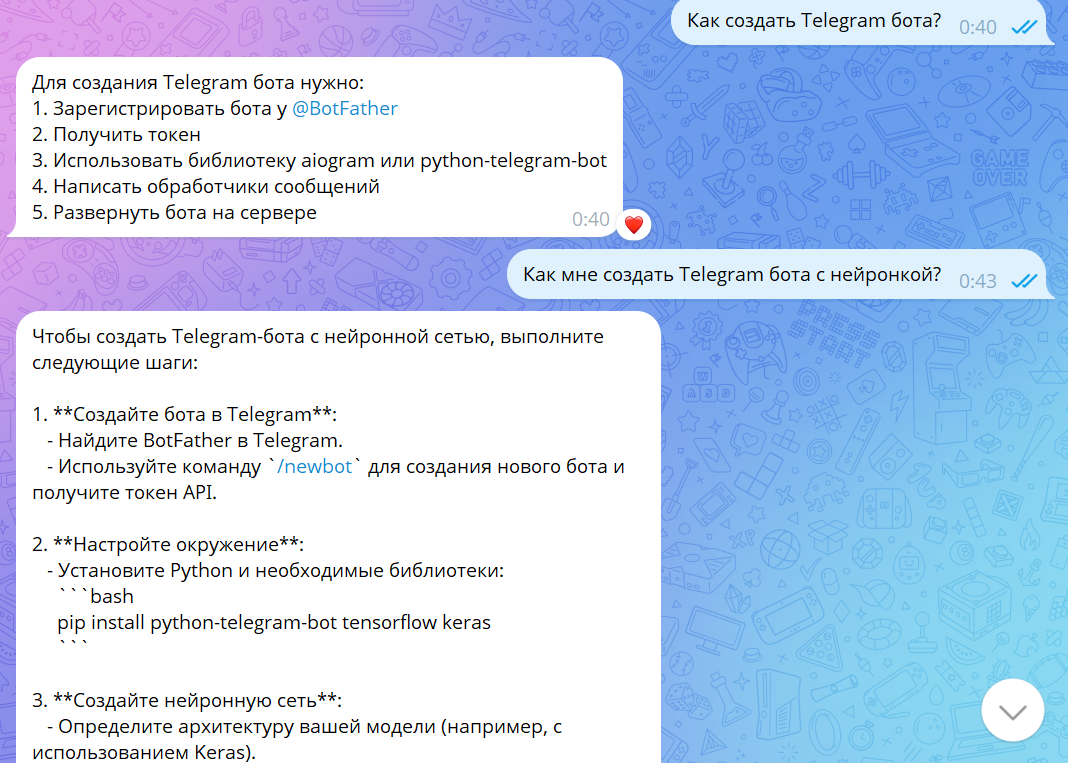

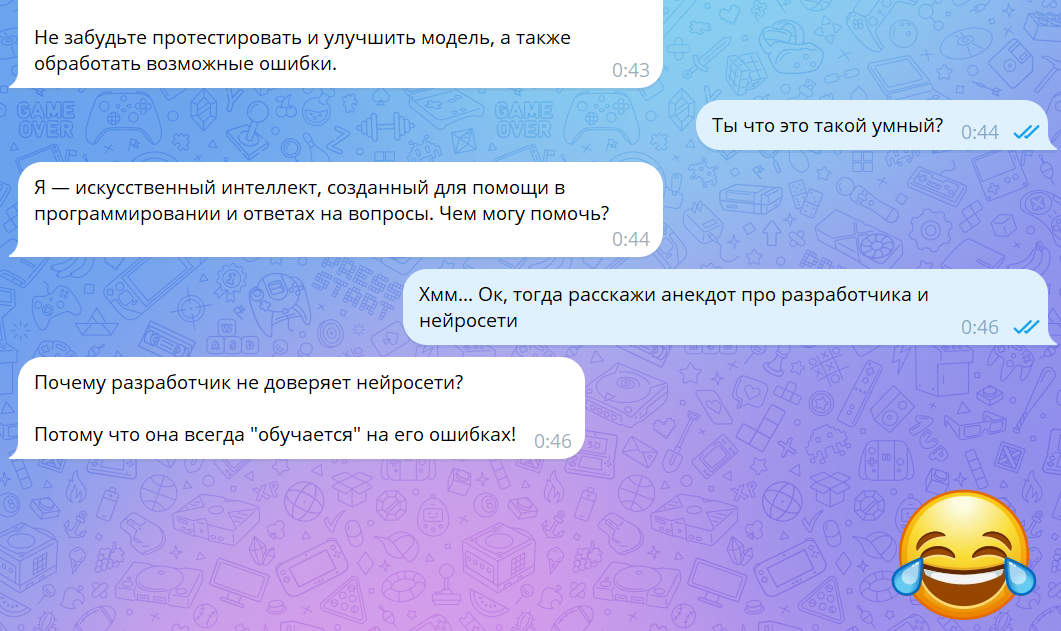

**Выводы по созданию Telegram-бота с базой знаний и интеграцией с VseGPT API:**

1. **Успешная настройка окружения**:
   - Библиотеки `aiogram`, `openai` и `nest_asyncio` установлены и импортированы корректно.
   - Настроена работа асинхронного кода в Google Colab с помощью `nest_asyncio.apply()`.

2. **Работа с токенами**:
   - Токены Telegram (`TELEGRAM_BOT_TOKEN`) и VseGPT (`VSEGPT_API_KEY`) загружаются из секретов Colab.
   - Реализована обработка ошибок при их отсутствии.

3. **База знаний**:
   - Создана структурированная база знаний с тематикой, количеством записей и примерами вопросов.
   - Контент базы знаний включает 15 записей по темам программирования и ИИ.

4. **Функционал бота**:
   - Реализованы команды `/start` и `/help`, которые предоставляют информацию о боте и базе знаний.
   - Обработчик текстовых сообщений сначала проверяет базу знаний, а затем обращается к VseGPT API, если ответ не найден.

5. **Интеграция с VseGPT API**:
   - Используется модель `openai/gpt-4o-mini` для генерации ответов на вопросы, отсутствующие в базе знаний.
   - Настроены параметры запроса (`temperature=0.3`) для получения более точных ответов.

6. **Асинхронный запуск**:
   - Бот запускается асинхронно с помощью `asyncio`, что позволяет ему работать в фоновом режиме.
   - Реализована корректная остановка бота при прерывании работы.

7. **Идеи по улучшению**:
   - Для улучшения бота можно добавить логирование запросов и ошибок.
   - Расширить базу знаний, включив больше вопросов и ответов.
   - Реализовать кэширование ответов от VseGPT API для уменьшения количества запросов.

Бот успешно создан и готов к использованию. Он сочетает локальную базу знаний с возможностями VseGPT API, что делает его универсальным помощником в области программирования и ИИ.